# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Users/zhenfengliu/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


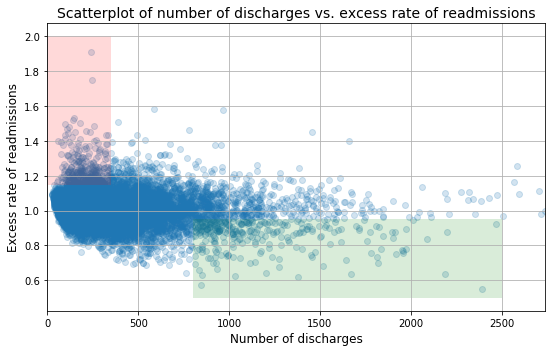

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

### A. Do you agree with the above analysis and recommendations? Why or why not?

I cannot agree with the above analysis and recommendations. (1) The statements made in observations were largely unfounded without statistic data to support them. They were based only on visual inspection. The relationship between discharge numbers and readmission rates were largely speculation. (2) The statistics presented were without significance tests. Therefore, it was unclear whether the observed differenes reflect true differences or purely by chance. (3) Statements in conclusions were totally unfounded. Signficance were claimed without statistical support. The cause of differences in readmission rates were purely conjecture. (4) Recommendation were based on shaky conclusions, therefore were also questionable. Additionally, there is no evidence that the recommendated solutions would be effective.

### B. Provide support for your arguments and your own recommendations with a statistically sound analysis:
   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 

Test 1:<br>
Null hypothesis: Excess readmission ratios are not correlated with the numbers of discharges.<br>
Alternate hypothesis: Excess readmission ratios are correlated with the numbers of discharges.<br>

In [5]:
#Clean up the data a little bit, removing entries with 0 discharges.
clean_hospital_read_df = clean_hospital_read_df.loc[clean_hospital_read_df['Number of Discharges']>0]
x = clean_hospital_read_df['Number of Discharges']
y = clean_hospital_read_df['Excess Readmission Ratio']
#Using the bootstraping approach
alpha = 0.01
pearson_r = np.corrcoef(x, y)[0,1]
r_perm = np.empty(10000)
for i in range(10000):
    sample = np.random.permutation(x)
    r_perm[i] = np.corrcoef(sample, y)[0,1]
p = np.sum(abs(r_perm) >= abs(pearson_r)) / len(r_perm)
print('Using the bootstraping approach, p = {}.'.format(p))
if p < alpha:
    print ('Null hypothesis rejected, two variables are correlated.')
else:
    print ('Null hypothesis not rejected, two variables are not correlated.')

Using the bootstraping approach, p = 0.0.
Null hypothesis rejected, two variables are correlated.


In [6]:
#Using pearson-r test from scipy.stats
from scipy import stats
r, p = stats.pearsonr(x, y)
print('Pearson correlation coefficient = {}'.format(r))
print('p = {}'.format(p))
if p < alpha:
    print ('Null hypothesis rejected, two variables are correlated.')
else:
    print ('Null hypothesis not rejected, two variables are not correlated.')

Pearson correlation coefficient = -0.09739794351079353
p = 1.222547377680967e-25
Null hypothesis rejected, two variables are correlated.


The excess readmission ratio is correlated with the number of discharges, though the correlation coefficient is very small, suggesting the effect of hospital size on readmission ratio is small.

Test 2:<br>
Null hypothesis: The excess readmission ratios of large (number of discharges > 1000) hosptial are the same as those of small (number of discharges < 100) hospitals.<br>
Alternate hypothesis: The excess readmission ratios of large are different from those of small hospitals.

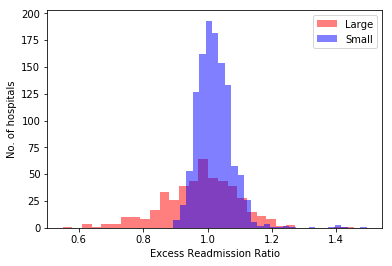

In [7]:
large = clean_hospital_read_df.loc[clean_hospital_read_df['Number of Discharges']>1000, 'Excess Readmission Ratio']
small = clean_hospital_read_df.loc[clean_hospital_read_df['Number of Discharges']<100, 'Excess Readmission Ratio']
#Take a quick look
_ = plt.hist(large, color = 'red', bins = 30, alpha = 0.5)
_ = plt.hist(small, color = 'blue', bins = 30, alpha = 0.5)
_ = plt.legend(['Large', 'Small'])
_ = plt.xlabel('Excess Readmission Ratio')
_ = plt.ylabel('No. of hospitals')

In [8]:
#Take a two samle t test
t, p = stats.ttest_ind(large, small)
print('p = {}'.format(p))
if p < alpha:
    print('Null hypothesis rejected, the excess readimission ratios of large and small hospitals are different.')
else:
    print('Null hypothesis not rejected, the excess readimission ratios of large and small hospitals are the same.')

p = 3.778753923341558e-23
Null hypothesis rejected, the excess readimission ratios of large and small hospitals are different.


#### 4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

In [9]:
print('The difference in readmission ratios between small and large hospitals is {:.3f}.'\
      .format(small.mean()-large.mean()))

The difference in readmission ratios between small and large hospitals is 0.044.


Excess readmission ratios of small and large hospitals were statistically different. But the acutal difference was very small. Therefore, I would not recommend any drastic measures such as the ones in the preliminary report. I noticed in the histogram above that some small hospitals had very high readmission ratios. It might be worthwile to focus on those hospitals to see what can be improved.

#### 5. Look at the scatterplot above.
What are the advantages and disadvantages of using this plot to convey information?
Construct another plot that conveys the same information in a more direct manner.

The advantage of scatter plot is that it allows you to see all the data at the same time, and notice any trend within the data. However, the density of data points, especially in certain areas, were too high that they overlap with each other, and some information were lost. Because of that, more attention were often given to outliers that are not representative of the whole population.<br>
I propose drawing a similar plot with density of data points plotted instead of individual data points, and plot X-axis in log scale to increase the resolution in hospitals with small number of admissions.

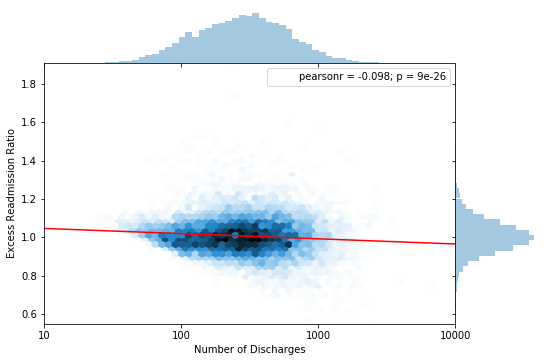

In [20]:
#Use the seaborn jointplot
import seaborn as sns
g = sns.jointplot(np.log10(x), y, kind = 'hex', xlim=(1,4), space = 0)
g.ax_joint.set_xticks([1, 2, 3, 4])
g.ax_joint.set_xticklabels(['10', '100', '1000', '10000'])
#Add a regression line to it
slope, intercept = np.polyfit(np.log10(x), y, 1)
line_x = [1,4]
line_y = [1*slope+intercept, 4*slope+intercept]
g.ax_joint.plot(line_x, line_y, color = 'red')
g.fig.set_size_inches(8,5)